 # Capstone Project - The Battle of Neighborhoods
 

In [8]:
!pip install geopy

     |████████████████████████████████| 112kB 7.4MB/s eta 0:00:01


In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import csv
import json
from pandas.io.json import json_normalize
from geopy.geocoders import Nominatim
import requests
import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib.colors import rgb2hex
from sklearn.cluster import KMeans
import folium
import math

### Data Loading

In [19]:
import pandas as pd
df = pd.read_excel('India_States.xlsx')
df.head()

,State,Code,District,Headquarters,Population,Area in km2,Density per km2,Latitude,Longitude
0,Andhra Pradesh,AN,Anantapur,Anantapur,4083315,19130,213,14.685564,77.595406
1,Andhra Pradesh,CH,Chittoor,Chittoor,4170468,15152,275,13.217096,79.100677
2,Andhra Pradesh,CU,Kadapa,Kadapa,2884524,15359,188,14.477234,78.804932
3,Andhra Pradesh,EG,East Godavari,Kakinada,5151549,10807,477,17.321250,82.040714
4,Andhra Pradesh,GU,Guntur,Guntur,4889230,11391,429,16.314209,80.435028


#### Droping missing values

In [20]:
df.replace('NaN', np.nan, inplace=True)
df = df.dropna()
df.head()

,State,Code,District,Headquarters,Population,Area in km2,Density per km2,Latitude,Longitude
0,Andhra Pradesh,AN,Anantapur,Anantapur,4083315,19130,213,14.685564,77.595406
1,Andhra Pradesh,CH,Chittoor,Chittoor,4170468,15152,275,13.217096,79.100677
2,Andhra Pradesh,CU,Kadapa,Kadapa,2884524,15359,188,14.477234,78.804932
3,Andhra Pradesh,EG,East Godavari,Kakinada,5151549,10807,477,17.321250,82.040714
4,Andhra Pradesh,GU,Guntur,Guntur,4889230,11391,429,16.314209,80.435028


In [21]:
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]
print(rows_with_NaN)

Empty DataFrame
Columns: [State, Code, District, Headquarters, Population, Area in km2, Density per km2, Latitude, Longitude]
Index: []


In [26]:
df_state_population = df[['State', 'Population']]
df_state_population.head()

,State,Population
0,Andhra Pradesh,4083315
1,Andhra Pradesh,4170468
2,Andhra Pradesh,2884524
3,Andhra Pradesh,5151549
4,Andhra Pradesh,4889230


In [27]:
df_state = df_state_population.groupby(['State'], as_index=False).sum()
df_state.head()

,State,Population
0,Andaman and Nicobar,274984
1,Andhra Pradesh,49378776
2,Arunachal Pradesh,1606047
3,Assam,36082551
4,Bihar,101011751


### Analysing Data

<BarContainer object of 36 artists>

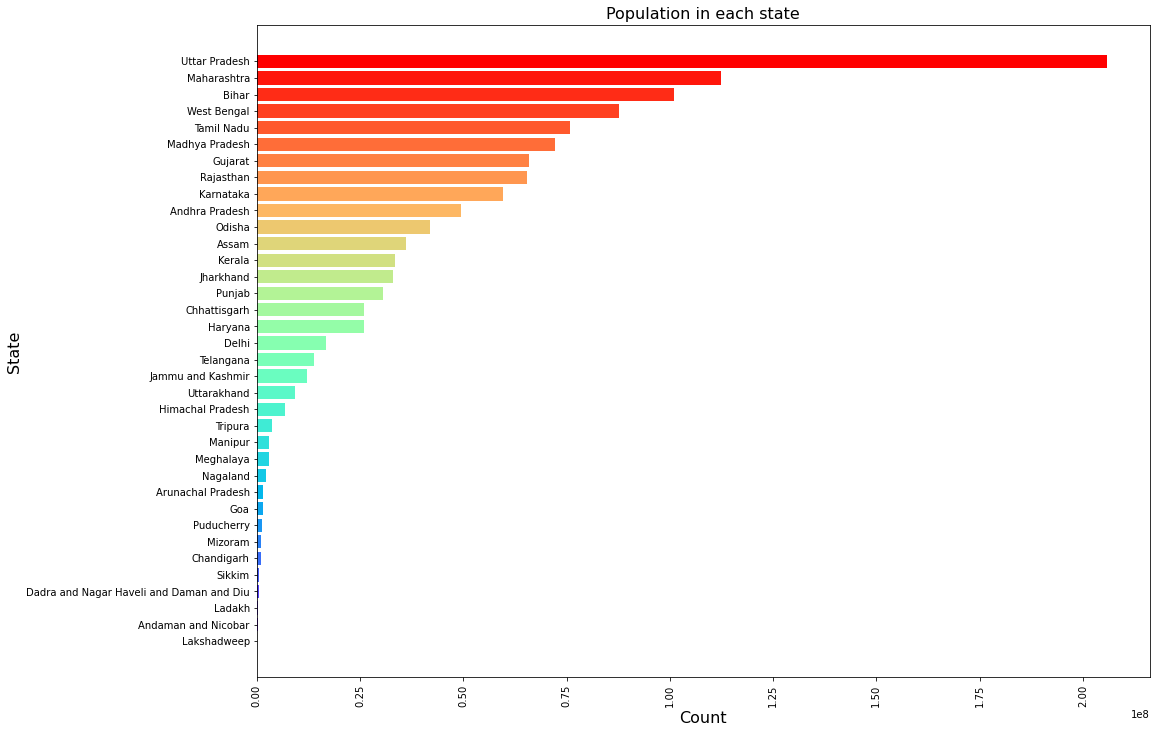

In [28]:
df_state.sort_values('Population',inplace=True)
population = df_state['Population']
state = df_state['State']


colors = cm.rainbow(np.linspace(0, 1, len(population.index)))
plt.figure(figsize = (16, 12))
plt.xticks(rotation = 90)
plt.xlabel("Count", fontsize = 16)
plt.ylabel("State", fontsize = 16)
plt.title("Population in each state", fontsize = 16)
plt.barh(state, population.values, color = colors)

In [45]:
state_name = input('Enter a State - ')

Enter a State -  kerala


In [47]:
geolocator = Nominatim(user_agent="tourist_explorist")
location = geolocator.geocode(state_name)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of ' + state_name + ' are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of kerala are 10.3528744, 76.5120396.


#### Creating a map of State with districts superimposed on top

In [54]:
df_user_state = df[df['State']=='Kerala'].reset_index(drop=True)
df_user_state

,State,Code,District,Headquarters,Population,Area in km2,Density per km2,Latitude,Longitude
0,Kerala,AL,Alappuzha,Alappuzha,2121943,1415,1501,9.498067,76.338844
1,Kerala,ER,Ernakulam,Kakkanad,3279860,3063,1069,9.931233,76.267303
2,Kerala,ID,Idukki,Painavu,1107453,4356,254,9.813808,76.929735
3,Kerala,KN,Kannur,Kannur,2525637,2961,852,11.874477,75.370369
4,Kerala,KS,Kasaragod,Kasaragod,1302600,1989,654,12.507643,74.988213
5,Kerala,KL,Kollam,Kollam,2629703,2483,1056,8.893212,76.614143
6,Kerala,KT,Kottayam,Kottayam,1979384,2206,896,9.591441,76.522171
7,Kerala,KZ,Kozhikode,Kozhikode,3089543,2345,1318,11.258753,75.780411
8,Kerala,MA,Malappuram,Malappuram,4110956,3554,1058,11.072035,76.074005
9,Kerala,PL,Palakkad,Palakkad,2810892,4482,627,10.784703,76.653145


In [55]:
#map of State using latitude and longitude values
map_state = folium.Map(location=[latitude, longitude], zoom_start=7)


# add markers to map
for lat, lng, st, district in zip(df_user_state['Latitude'], df_user_state['Longitude'], df_user_state['State'], df_user_state['District']):
    label = '{}, {}'.format(district, st)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_state)  
    
map_state

## Using Foursquare API

#### Credentials have been masked and cell is converted to markdown
CLIENT_ID = '**' # your Foursquare ID

CLIENT_SECRET = '**' # your Foursquare Secret

VERSION = '**' # Foursquare API version




In [57]:
url = 'https://api.foursquare.com/v2/venues/categories?&client_id={}&client_secret={}&v={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION)

category_results = requests.get(url).json()
category_results

{'meta': {'code': 200, 'requestId': '605bacb409a87a123ebdc68c'},
 'response': {'categories': [{'id': '4d4b7104d754a06370d81259',
    'name': 'Arts & Entertainment',
    'pluralName': 'Arts & Entertainment',
    'shortName': 'Arts & Entertainment',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/default_',
     'suffix': '.png'},
    'categories': [{'id': '56aa371be4b08b9a8d5734db',
      'name': 'Amphitheater',
      'pluralName': 'Amphitheaters',
      'shortName': 'Amphitheater',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/default_',
       'suffix': '.png'},
      'categories': []},
     {'id': '4fceea171983d5d06c3e9823',
      'name': 'Aquarium',
      'pluralName': 'Aquariums',
      'shortName': 'Aquarium',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/aquarium_',
       'suffix': '.png'},
      'categories': []},
     {'id': '4bf58dd8d48988d1e1931735',
      'name': 'A

In [58]:
categories = len(category_results['response']['categories'])

for i in range(categories):
    venues = category_results['response']['categories'][i]['name']
    print(venues)
    for j in range(len(category_results['response']['categories'][i]['categories'])):
        sub_venues = category_results['response']['categories'][i]['categories'][j]['name']
        print('\t\t' + sub_venues)

Arts & Entertainment
		Amphitheater
		Aquarium
		Arcade
		Art Gallery
		Bowling Alley
		Casino
		Circus
		Comedy Club
		Concert Hall
		Country Dance Club
		Disc Golf
		Escape Room
		Exhibit
		General Entertainment
		Go Kart Track
		Historic Site
		Karaoke Box
		Laser Tag
		Memorial Site
		Mini Golf
		Movie Theater
		Museum
		Music Venue
		Pachinko Parlor
		Performing Arts Venue
		Pool Hall
		Public Art
		Racecourse
		Racetrack
		Roller Rink
		Salsa Club
		Samba School
		Stadium
		Theme Park
		Tour Provider
		VR Cafe
		Water Park
		Zoo
College & University
		College Academic Building
		College Administrative Building
		College Auditorium
		College Bookstore
		College Cafeteria
		College Classroom
		College Gym
		College Lab
		College Library
		College Quad
		College Rec Center
		College Residence Hall
		College Stadium
		College Theater
		Community College
		Fraternity House
		General College & University
		Law School
		Medical School
		Sorority House
		Student Center
		Trade School
		U

In [59]:
all_categories = {}

for i in range(categories):
    venues = category_results['response']['categories'][i]['name']
    all_categories[venues] = i

print(all_categories)

{'Arts & Entertainment': 0, 'College & University': 1, 'Event': 2, 'Food': 3, 'Nightlife Spot': 4, 'Outdoors & Recreation': 5, 'Professional & Other Places': 6, 'Residence': 7, 'Shop & Service': 8, 'Travel & Transport': 9}


In [60]:
tourist_category = []
business_category = []
req_categories = ['Arts & Entertainment', 'Nightlife Spot', 'Outdoors & Recreation']
req_categories2 = ['Food', 'Shop & Service', 'Travel & Transport']


for i in req_categories:
    key = all_categories.get(i)
    venues = category_results['response']['categories'][key]['name']
    tourist_category.append(venues)
    for j in range(len(category_results['response']['categories'][key]['categories'])):
        sub_venues = category_results['response']['categories'][key]['categories'][j]['name']
        tourist_category.append(sub_venues)

for i in req_categories2:
    key = all_categories.get(i)
    venues = category_results['response']['categories'][key]['name']
    business_category.append(venues)
    for j in range(len(category_results['response']['categories'][key]['categories'])):
        sub_venues = category_results['response']['categories'][key]['categories'][j]['name']
        business_category.append(sub_venues)

In [61]:
#remove unwanted categories from tourist list
tourist_category.remove('Lounge')
tourist_category.remove('Movie Theater')
tourist_category.remove('Bar')

#remove unwanted categories from business list
business_category.remove('Bus Station')
business_category.remove('ATM')
business_category.remove('Train Station')
business_category.remove('Bus Stop')
business_category.remove('Light Rail Station')
business_category.remove('Toll Booth')
business_category.remove('Toll Plaza')
business_category.remove('Tram Station')

In [62]:
LIMIT = 25

def getNearbyVenues_tourist(names, latitudes, longitudes, radius=50000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['District', 
                  'District Latitude', 
                  'District Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    nearby_venues = nearby_venues[nearby_venues['Venue Category'].isin(tourist_category)]
    
    return(nearby_venues)


In [63]:
state_venues = getNearbyVenues_tourist(names=df_user_state['District'],
                                   latitudes=df_user_state['Latitude'],
                                   longitudes=df_user_state['Longitude']
                                  )

Alappuzha
Ernakulam
Idukki
Kannur
Kasaragod
Kollam
Kottayam
Kozhikode
Malappuram
Palakkad
Pathanamthitta
Thrissur
Thiruvananthapuram
Wayanad


In [64]:
print(state_venues.shape)
state_venues

(58, 7)


,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Alappuzha,9.498067,76.338844,Alappuzha,9.491177,76.338213,Scenic Lookout
3,Alappuzha,9.498067,76.338844,Alappuzha Light House,9.494063,76.320793,Lighthouse
7,Alappuzha,9.498067,76.338844,Kumarakom Backwaters,9.633241,76.424110,Lake
8,Alappuzha,9.498067,76.338844,Marari Beach,9.601014,76.299875,Beach
24,Alappuzha,9.498067,76.338844,Alappuzha Beach,9.493795,76.318446,Beach
27,Ernakulam,9.931233,76.267303,Springr,9.962293,76.257809,Performing Arts Venue
38,Ernakulam,9.931233,76.267303,David Hall,9.965296,76.239396,Art Gallery
42,Ernakulam,9.931233,76.267303,Pepper House,9.968881,76.250213,Art Gallery
48,Ernakulam,9.931233,76.267303,Durbar Hall Art Gallery,9.968547,76.283756,Art Gallery
49,Ernakulam,9.931233,76.267303,Rajiv Gandhi indoor stadium,9.968513,76.298286,Stadium


In [65]:
all_venues = state_venues['Venue'].tolist()
len(all_venues)

58

In [66]:
no_venues_in_district = state_venues.groupby('District', as_index=False).count()
no_venues_in_district = no_venues_in_district[['District','Venue']]
no_venues_in_district.rename(columns={'Venue':'No of Venues'}, inplace=True)
no_venues_in_district

,District,No of Venues
0,Alappuzha,5
1,Ernakulam,5
2,Idukki,8
3,Kannur,4
4,Kasaragod,1
5,Kollam,6
6,Kottayam,4
7,Kozhikode,3
8,Malappuram,2
9,Palakkad,2


In [67]:
max_no_of_venues = no_venues_in_district['No of Venues'].max()
max_no_of_venues

8

## Count number of venues retrieved in each District

<BarContainer object of 14 artists>

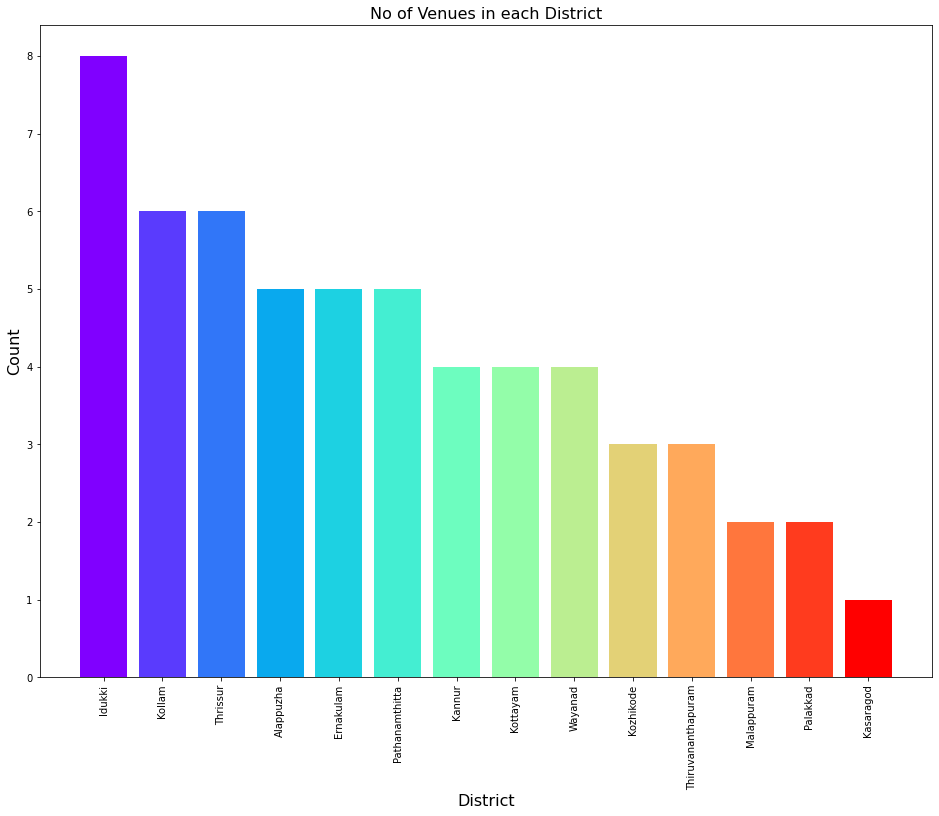

In [68]:
no_venues_in_district.sort_values('No of Venues', ascending=False, inplace=True)
venues = no_venues_in_district['No of Venues']
district = no_venues_in_district['District']


colors = cm.rainbow(np.linspace(0, 1, len(venues.index)))
plt.figure(figsize = (16, 12))
plt.xticks(rotation = 90)
plt.xlabel("District", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.title("No of Venues in each District", fontsize = 16)
plt.bar(district, venues.values, color = colors)

### Unique categories curated from all the returned venues

In [69]:
print('There are {} uniques categories.'.format(len(state_venues['Venue Category'].unique())))

There are 17 uniques categories.


In [70]:
state_venues['Venue Category'].unique()

array(['Scenic Lookout', 'Lighthouse', 'Lake', 'Beach',
       'Performing Arts Venue', 'Art Gallery', 'Stadium', 'Field',
       'Roof Deck', 'Garden', 'Historic Site', 'Playground', 'Park',
       'Campground', 'Zoo', 'Waterfall', 'Mountain'], dtype=object)

## Analyze Each District

In [71]:
# one hot encoding
state_venues_onehot = pd.get_dummies(state_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
state_venues_onehot['District'] = state_venues['District'] 

# move neighborhood column to the first column
fixed_columns = [state_venues_onehot.columns[-1]] + list(state_venues_onehot.columns[:-1])
state_venues_onehot = state_venues_onehot[fixed_columns]

state_venues_onehot.head()

,District,Art Gallery,Beach,Campground,Field,Garden,Historic Site,Lake,Lighthouse,Mountain,Park,Performing Arts Venue,Playground,Roof Deck,Scenic Lookout,Stadium,Waterfall,Zoo
0,Alappuzha,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,Alappuzha,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
7,Alappuzha,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
8,Alappuzha,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
24,Alappuzha,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [72]:
state_venues_onehot.shape

(58, 18)

#### Group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [73]:
state_venues_grouped = state_venues_onehot.groupby('District').mean().reset_index()
state_venues_grouped

,District,Art Gallery,Beach,Campground,Field,Garden,Historic Site,Lake,Lighthouse,Mountain,Park,Performing Arts Venue,Playground,Roof Deck,Scenic Lookout,Stadium,Waterfall,Zoo
0,Alappuzha,0.0,0.400000,0.000000,0.000,0.000,0.00,0.20,0.20,0.0,0.000000,0.00,0.000000,0.000,0.200,0.0,0.000000,0.000000
1,Ernakulam,0.6,0.000000,0.000000,0.000,0.000,0.00,0.00,0.00,0.0,0.000000,0.20,0.000000,0.000,0.000,0.2,0.000000,0.000000
2,Idukki,0.0,0.000000,0.000000,0.125,0.125,0.00,0.00,0.00,0.0,0.000000,0.25,0.000000,0.125,0.375,0.0,0.000000,0.000000
3,Kannur,0.0,0.750000,0.000000,0.000,0.000,0.25,0.00,0.00,0.0,0.000000,0.00,0.000000,0.000,0.000,0.0,0.000000,0.000000
4,Kasaragod,0.0,0.000000,0.000000,0.000,0.000,1.00,0.00,0.00,0.0,0.000000,0.00,0.000000,0.000,0.000,0.0,0.000000,0.000000
5,Kollam,0.0,0.833333,0.000000,0.000,0.000,0.00,0.00,0.00,0.0,0.000000,0.00,0.166667,0.000,0.000,0.0,0.000000,0.000000
6,Kottayam,0.0,0.250000,0.000000,0.000,0.000,0.00,0.25,0.25,0.0,0.000000,0.00,0.000000,0.000,0.250,0.0,0.000000,0.000000
7,Kozhikode,0.0,0.666667,0.000000,0.000,0.000,0.00,0.00,0.00,0.0,0.333333,0.00,0.000000,0.000,0.000,0.0,0.000000,0.000000
8,Malappuram,0.0,0.500000,0.000000,0.000,0.000,0.00,0.00,0.00,0.0,0.500000,0.00,0.000000,0.000,0.000,0.0,0.000000,0.000000
9,Palakkad,0.0,0.000000,0.000000,0.000,0.500,0.00,0.00,0.00,0.0,0.500000,0.00,0.000000,0.000,0.000,0.0,0.000000,0.000000


#### Print each District along with the top 5 most common venues

In [75]:
num_top_venues = max_no_of_venues

for hood in state_venues_grouped['District']:
    print("----"+hood+"----")
    temp = state_venues_grouped[state_venues_grouped['District'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Alappuzha----
                   venue  freq
0                  Beach   0.4
1         Scenic Lookout   0.2
2                   Lake   0.2
3             Lighthouse   0.2
4            Art Gallery   0.0
5  Performing Arts Venue   0.0
6              Waterfall   0.0
7                Stadium   0.0


----Ernakulam----
                   venue  freq
0            Art Gallery   0.6
1                Stadium   0.2
2  Performing Arts Venue   0.2
3                   Park   0.0
4              Waterfall   0.0
5         Scenic Lookout   0.0
6              Roof Deck   0.0
7             Playground   0.0


----Idukki----
                   venue  freq
0         Scenic Lookout  0.38
1  Performing Arts Venue  0.25
2                  Field  0.12
3                 Garden  0.12
4              Roof Deck  0.12
5            Art Gallery  0.00
6              Waterfall  0.00
7                Stadium  0.00


----Kannur----
                   venue  freq
0                  Beach  0.75
1          Historic Site  0.2

#### Put this into a pandas dataframe

In [76]:
#function to sort the venues in descending order

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [77]:
#create the new dataframe and display the top 10 venues for each district

num_top_venues = max_no_of_venues

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['District']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue Category'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue Category'.format(ind+1))

# create a new dataframe
district_venues_sorted = pd.DataFrame(columns=columns)
district_venues_sorted['District'] = state_venues_grouped['District']

for ind in np.arange(state_venues_grouped.shape[0]):
    district_venues_sorted.iloc[ind, 1:] = return_most_common_venues(state_venues_grouped.iloc[ind, :], num_top_venues)

district_venues_sorted.head()

,District,1st Most Common Venue Category,2nd Most Common Venue Category,3rd Most Common Venue Category,4th Most Common Venue Category,5th Most Common Venue Category,6th Most Common Venue Category,7th Most Common Venue Category,8th Most Common Venue Category
0,Alappuzha,Beach,Lighthouse,Scenic Lookout,Lake,Zoo,Campground,Field,Garden
1,Ernakulam,Art Gallery,Stadium,Performing Arts Venue,Lake,Beach,Campground,Field,Garden
2,Idukki,Scenic Lookout,Performing Arts Venue,Roof Deck,Field,Garden,Zoo,Lake,Beach
3,Kannur,Beach,Historic Site,Zoo,Lighthouse,Campground,Field,Garden,Lake
4,Kasaragod,Historic Site,Zoo,Lighthouse,Beach,Campground,Field,Garden,Lake


In [78]:
venue_venue_category = state_venues.groupby(['District', 'Venue Category'], as_index=False).agg(lambda x: ", ".join(x))
venue_venue_category.head()

,District,Venue Category,Venue
0,Alappuzha,Beach,"Marari Beach, Alappuzha Beach"
1,Alappuzha,Lake,Kumarakom Backwaters
2,Alappuzha,Lighthouse,Alappuzha Light House
3,Alappuzha,Scenic Lookout,Alappuzha
4,Ernakulam,Art Gallery,"David Hall, Pepper House, Durbar Hall Art Gallery"


In [80]:
r, c = district_venues_sorted.shape

for rows in range(r):
    a = district_venues_sorted.iloc[rows, 0]
    for col, col_name in enumerate(district_venues_sorted.columns[1:]):
        b = district_venues_sorted.iloc[rows, col+1]
        pf = venue_venue_category[venue_venue_category['District'].str.contains(a) & venue_venue_category['Venue Category'].str.contains(b)]
        if not pf.empty:
            #print(b)
            idx = pf['Venue'].index.values.astype(int)[0]
            ven = pf['Venue'][idx]
            district_venues_sorted.iloc[rows, district_venues_sorted.columns.get_loc(col_name)] = ven
        elif pf.empty:
            district_venues_sorted.iloc[rows, district_venues_sorted.columns.get_loc(col_name)] = ''

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [81]:
indicators = ['st', 'nd', 'rd']
new = []

for ind in np.arange(max_no_of_venues):
    try:
        new.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        new.append('{}th Most Common Venue'.format(ind+1))

district_venues_sorted.columns = district_venues_sorted.columns[:1].tolist() + new

In [82]:
district_venues_sorted

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue
0,Alappuzha,,,,,"Marari Beach, Alappuzha Beach","Marari Beach, Alappuzha Beach","Marari Beach, Alappuzha Beach","Marari Beach, Alappuzha Beach"
1,Ernakulam,,,,"David Hall, Pepper House, Durbar Hall Art Gallery","David Hall, Pepper House, Durbar Hall Art Gallery","David Hall, Pepper House, Durbar Hall Art Gallery","David Hall, Pepper House, Durbar Hall Art Gallery","David Hall, Pepper House, Durbar Hall Art Gallery"
2,Idukki,,,,,,Vagamon Meadows,Vagamon Meadows,Vagamon Meadows
3,Kannur,,,"Payyambalam Beach, Baby Beach, Muzhappilangad ...","Payyambalam Beach, Baby Beach, Muzhappilangad ...","Payyambalam Beach, Baby Beach, Muzhappilangad ...","Payyambalam Beach, Baby Beach, Muzhappilangad ...","Payyambalam Beach, Baby Beach, Muzhappilangad ...","Payyambalam Beach, Baby Beach, Muzhappilangad ..."
4,Kasaragod,,Bekal Fort,Bekal Fort,Bekal Fort,Bekal Fort,Bekal Fort,Bekal Fort,Bekal Fort
5,Kollam,,,"Thirumullavaram Beach, Neendakara Fishing Harb...","Thirumullavaram Beach, Neendakara Fishing Harb...","Thirumullavaram Beach, Neendakara Fishing Harb...","Thirumullavaram Beach, Neendakara Fishing Harb...","Thirumullavaram Beach, Neendakara Fishing Harb...","Thirumullavaram Beach, Neendakara Fishing Harb..."
6,Kottayam,,,,,Marari Beach,Marari Beach,Marari Beach,Marari Beach
7,Kozhikode,,,"Calicut Beach, Kappad Beach","Calicut Beach, Kappad Beach","Calicut Beach, Kappad Beach","Calicut Beach, Kappad Beach","Calicut Beach, Kappad Beach","Calicut Beach, Kappad Beach"
8,Malappuram,,,Calicut Beach,Calicut Beach,Calicut Beach,Calicut Beach,Calicut Beach,Calicut Beach
9,Palakkad,,,Malampuzha Dam and Garden,Malampuzha Dam and Garden,Malampuzha Dam and Garden,Malampuzha Dam and Garden,Malampuzha Dam and Garden,Malampuzha Dam and Garden


### Get Nearby Businesses

In [83]:
LIMIT = 25

def getNearbyBusiness(names, latitudes, longitudes, radius=500):
    
    business_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby business
        business_list.append([(name,
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_business = pd.DataFrame([item for business_list in business_list for item in business_list])
    nearby_business.columns = ['Venue',
                    'Business', 
                  'BLatitude', 
                  'BLongitude', 
                  'Business Category']
    
    nearby_business = nearby_business[nearby_business['Business Category'].isin(business_category)]
    
    return(nearby_business)

In [85]:
nearby_business = getNearbyBusiness(names=state_venues['Venue'],
                                   latitudes=state_venues['Venue Latitude'],
                                   longitudes=state_venues['Venue Longitude']
                                  )

Alappuzha
Alappuzha Light House
Kumarakom Backwaters
Marari Beach
Alappuzha Beach
Springr
David Hall
Pepper House
Durbar Hall Art Gallery
Rajiv Gandhi indoor stadium
Vagamon Meadows
The Panoramic Getaway Hotel
Kadathanadan Kalari Centre, Thekkady
Tea Gardens, Munnar
Cheyaparra Falls, Munnar
Punarjani Traditional Village
Mundakkayam
Mattupetty Dam
Payyambalam Beach
St. Angelo Fort
Baby Beach
Muzhappilangad Drive-in Beach
Bekal Fort
Thirumullavaram Beach
Neendakara Fishing Harbour
Kollam-Asramam ground
Varkala Beach
South Cliff Beach
Black Beach
Kumarakom Backwaters
Alappuzha
Marari Beach
Alappuzha Light House
Calicut Beach
Kappad Beach
Mananchira Square
Calicut Beach
Mananchira Square
Malampuzha Dam and Garden
Race Course Road
Neendakara Fishing Harbour
Thirumullavaram Beach
Vagamon Meadows
Kollam-Asramam ground
Mundakkayam
Tekkinkadu Maidanam
Snehatheeram Beach
Elephant Yard (Ahnakotta)
Naatika Beach
Cherai Beach
Athirapally Waterfalls
Shanghumukham Beach
Lighthouse Beach
Kovalam Beach

In [86]:
print(nearby_business.shape)
nearby_business

(224, 5)


,Venue,Business,BLatitude,BLongitude,Business Category
1,Alappuzha,Brothers hotel,9.491777,76.337675,Indian Restaurant
2,Alappuzha,Indian Coffee House,9.490383,76.338433,Indian Restaurant
3,Alappuzha,Palmyra Grandsuite,9.489237,76.338370,Restaurant
4,Alappuzha,Thaff Restaurant,9.493222,76.342250,Indian Restaurant
7,Alappuzha Light House,Indian Coffee House,9.494342,76.318604,Indian Restaurant
...,...,...,...,...,...
391,Kovalam Beach,Catamaran,8.390717,76.977225,Restaurant
392,Kovalam Beach,Santana Restaurant,8.385209,76.979442,Diner
394,Lakkidi View Point,Cafe Coffee Day,11.518332,76.021202,Café
396,Lakkidi View Point,Spice Bowl,11.514766,76.021810,Indian Restaurant


In [87]:
no_nearby_business = nearby_business.groupby('Business Category', as_index=False).count()
no_nearby_business = no_nearby_business[['Business Category','Business']]
no_nearby_business.rename(columns={'Business':'No of Businesses'}, inplace=True)
no_nearby_business

,Business Category,No of Businesses
0,Asian Restaurant,10
1,Bakery,5
2,Bistro,1
3,Boat or Ferry,2
4,Breakfast Spot,2
5,Burger Joint,5
6,Café,11
7,Cajun / Creole Restaurant,1
8,Clothing Store,1
9,Coffee Shop,3


#### Perform one-hot encoding of the business categories retrieved

In [88]:
# one hot encoding
nearby_business_onehot = pd.get_dummies(nearby_business[['Business Category']], prefix="", prefix_sep="")

# add venue column back to dataframe
nearby_business_onehot['Venue'] = nearby_business['Venue'] 

# move venue column to the first column
fixed_columns = [nearby_business_onehot.columns[-1]] + list(nearby_business_onehot.columns[:-1])
nearby_business_onehot = nearby_business_onehot[fixed_columns]

nearby_business_onehot.head()

,Venue,Asian Restaurant,Bakery,Bistro,Boat or Ferry,Breakfast Spot,Burger Joint,Café,Cajun / Creole Restaurant,Clothing Store,...,Mexican Restaurant,Music Store,Pizza Place,Restaurant,Sandwich Place,Seafood Restaurant,Snack Place,Tea Room,Tourist Information Center,Vegetarian / Vegan Restaurant
1,Alappuzha,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Alappuzha,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Alappuzha,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,Alappuzha,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Alappuzha Light House,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
nearby_business_grouped = nearby_business_onehot.groupby('Venue').mean().reset_index()
nearby_business_grouped

,Venue,Asian Restaurant,Bakery,Bistro,Boat or Ferry,Breakfast Spot,Burger Joint,Café,Cajun / Creole Restaurant,Clothing Store,...,Mexican Restaurant,Music Store,Pizza Place,Restaurant,Sandwich Place,Seafood Restaurant,Snack Place,Tea Room,Tourist Information Center,Vegetarian / Vegan Restaurant
0,Alappuzha,0.000000,0.000000,0.000000,0.0,0.000000,0.000,0.000000,0.000000,0.00,...,0.000000,0.000000,0.000000,0.250000,0.000,0.000000,0.00,0.000000,0.0,0.000000
1,Alappuzha Beach,0.000000,0.000000,0.000000,0.0,0.000000,0.000,0.000000,0.000000,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.00,0.000000,0.0,0.000000
2,Alappuzha Light House,0.000000,0.000000,0.000000,0.0,0.000000,0.000,0.200000,0.000000,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000,0.200000,0.00,0.000000,0.0,0.000000
3,Baby Beach,0.000000,0.000000,0.000000,0.0,0.000000,0.000,0.000000,0.000000,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.00,0.000000,0.0,0.000000
4,Bekal Fort,0.000000,0.000000,0.000000,0.0,0.000000,0.000,0.000000,0.000000,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.00,0.000000,0.0,0.000000
5,Black Beach,0.000000,0.000000,0.000000,0.0,0.000000,0.000,0.333333,0.000000,0.00,...,0.000000,0.000000,0.000000,0.166667,0.000,0.000000,0.00,0.000000,0.0,0.000000
6,Calicut Beach,0.000000,0.000000,0.000000,0.0,0.000000,0.200,0.000000,0.000000,0.00,...,0.000000,0.000000,0.000000,0.300000,0.000,0.000000,0.10,0.000000,0.0,0.200000
7,Cherai Beach,0.000000,0.000000,0.000000,0.0,0.000000,0.000,0.000000,0.000000,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.00,0.000000,0.0,0.000000
8,"Cheyaparra Falls, Munnar",0.000000,0.000000,0.000000,0.0,0.000000,0.000,0.500000,0.000000,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.00,0.000000,0.0,0.000000
9,David Hall,0.111111,0.000000,0.000000,0.0,0.000000,0.000,0.111111,0.055556,0.00,...,0.000000,0.000000,0.000000,0.055556,0.000,0.111111,0.00,0.055556,0.0,0.000000


#### Print each venue along with the top 5 most common business

In [90]:
num_top_business = 5

for hood in nearby_business_grouped['Venue']:
    print("----"+hood+"----")
    temp = nearby_business_grouped[nearby_business_grouped['Venue'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_business))
    print('\n')

----Alappuzha----
                venue  freq
0   Indian Restaurant  0.75
1          Restaurant  0.25
2    Asian Restaurant  0.00
3  Mexican Restaurant  0.00
4  Italian Restaurant  0.00


----Alappuzha Beach----
                venue  freq
0   Indian Restaurant   1.0
1    Asian Restaurant   0.0
2              Bakery   0.0
3  Italian Restaurant   0.0
4       Jewelry Store   0.0


----Alappuzha Light House----
                venue  freq
0   Indian Restaurant   0.6
1  Seafood Restaurant   0.2
2                Café   0.2
3         Music Store   0.0
4  Italian Restaurant   0.0


----Baby Beach----
                venue  freq
0   Indian Restaurant   1.0
1    Asian Restaurant   0.0
2              Bakery   0.0
3  Italian Restaurant   0.0
4       Jewelry Store   0.0


----Bekal Fort----
                venue  freq
0               Hotel   1.0
1              Bakery   0.0
2   Indian Restaurant   0.0
3  Italian Restaurant   0.0
4       Jewelry Store   0.0


----Black Beach----
                venu

#### Put this into a pandas dataframe

In [91]:
#function to sort the business in descending order

def return_most_common_business(row, num_top_business):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_business]

In [92]:
num_top_business = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top business
columns = ['Venue']
for ind in np.arange(num_top_business):
    try:
        columns.append('{}{} Most Common Business'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Business'.format(ind+1))

# create a new dataframe
nearby_business_sorted = pd.DataFrame(columns=columns)
nearby_business_sorted['Venue'] = nearby_business_grouped['Venue']

for ind in np.arange(nearby_business_grouped.shape[0]):
    nearby_business_sorted.iloc[ind, 1:] = return_most_common_business(nearby_business_grouped.iloc[ind, :], num_top_business)

nearby_business_sorted.head()

,Venue,1st Most Common Business,2nd Most Common Business,3rd Most Common Business,4th Most Common Business,5th Most Common Business,6th Most Common Business,7th Most Common Business,8th Most Common Business,9th Most Common Business,10th Most Common Business
0,Alappuzha,Indian Restaurant,Restaurant,Vegetarian / Vegan Restaurant,Clothing Store,Eastern European Restaurant,Diner,Dessert Shop,Department Store,Convenience Store,Coffee Shop
1,Alappuzha Beach,Indian Restaurant,Vegetarian / Vegan Restaurant,Fried Chicken Joint,Eastern European Restaurant,Diner,Dessert Shop,Department Store,Convenience Store,Coffee Shop,Clothing Store
2,Alappuzha Light House,Indian Restaurant,Seafood Restaurant,Café,Vegetarian / Vegan Restaurant,Coffee Shop,Eastern European Restaurant,Diner,Dessert Shop,Department Store,Convenience Store
3,Baby Beach,Indian Restaurant,Vegetarian / Vegan Restaurant,Fried Chicken Joint,Eastern European Restaurant,Diner,Dessert Shop,Department Store,Convenience Store,Coffee Shop,Clothing Store
4,Bekal Fort,Hotel,Vegetarian / Vegan Restaurant,Fried Chicken Joint,Eastern European Restaurant,Diner,Dessert Shop,Department Store,Convenience Store,Coffee Shop,Clothing Store


## Perform Clustering

Find the optimal k value for clustering

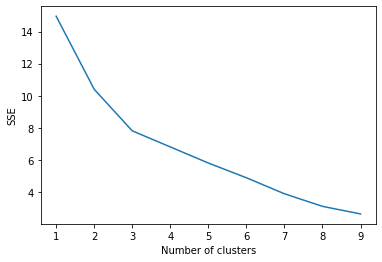

In [99]:
sse = {}
for k in range(1,10):
    kmeans = KMeans(n_clusters=k,random_state=0)
    kmeans.fit(nearby_business_grouped.drop('Venue',axis=1))
    nearby_business_grouped['Cluster'] = kmeans.labels_
    sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()

In [100]:
#Run k-means to cluster the neighborhood into 5 clusters

# set number of clusters
kclusters = 3

nearby_business_grouped_clustering = nearby_business_grouped.drop('Venue', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(nearby_business_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 0, 1, 0, 1, 2, 0, 1], dtype=int32)

In [101]:
#create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood

# add clustering labels
nearby_business_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

nearby_business_merged = nearby_business[['Venue']]
new_state_venues = state_venues[['Venue', 'Venue Latitude', 'Venue Longitude']]

nearby_business_merged = nearby_business_merged.join(new_state_venues.set_index('Venue'), on='Venue')

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
nearby_business_merged = nearby_business_merged.join(nearby_business_sorted.set_index('Venue'), on='Venue')

nearby_business_merged.drop_duplicates(subset='Venue', keep='first', inplace=True)
nearby_business_merged

,Venue,Venue Latitude,Venue Longitude,Cluster Labels,1st Most Common Business,2nd Most Common Business,3rd Most Common Business,4th Most Common Business,5th Most Common Business,6th Most Common Business,7th Most Common Business,8th Most Common Business,9th Most Common Business,10th Most Common Business
1,Alappuzha,9.491177,76.338213,0,Indian Restaurant,Restaurant,Vegetarian / Vegan Restaurant,Clothing Store,Eastern European Restaurant,Diner,Dessert Shop,Department Store,Convenience Store,Coffee Shop
7,Alappuzha Light House,9.494063,76.320793,0,Indian Restaurant,Seafood Restaurant,Café,Vegetarian / Vegan Restaurant,Coffee Shop,Eastern European Restaurant,Diner,Dessert Shop,Department Store,Convenience Store
15,Kumarakom Backwaters,9.633241,76.424110,0,Boat or Ferry,Vegetarian / Vegan Restaurant,Coffee Shop,Fast Food Restaurant,Eastern European Restaurant,Diner,Dessert Shop,Department Store,Convenience Store,Clothing Store
20,Marari Beach,9.601014,76.299875,1,Hotel,Vegetarian / Vegan Restaurant,Fried Chicken Joint,Eastern European Restaurant,Diner,Dessert Shop,Department Store,Convenience Store,Coffee Shop,Clothing Store
24,Alappuzha Beach,9.493795,76.318446,0,Indian Restaurant,Vegetarian / Vegan Restaurant,Fried Chicken Joint,Eastern European Restaurant,Diner,Dessert Shop,Department Store,Convenience Store,Coffee Shop,Clothing Store
28,Springr,9.962293,76.257809,1,Snack Place,Indian Restaurant,Market,Vegetarian / Vegan Restaurant,Clothing Store,Diner,Dessert Shop,Department Store,Convenience Store,Coffee Shop
34,David Hall,9.965296,76.239396,1,Hotel,Asian Restaurant,Café,Seafood Restaurant,Coffee Shop,Indian Restaurant,Italian Restaurant,Cajun / Creole Restaurant,Mediterranean Restaurant,Restaurant
59,Pepper House,9.968881,76.250213,1,Hotel,Seafood Restaurant,Vegetarian / Vegan Restaurant,Clothing Store,Eastern European Restaurant,Diner,Dessert Shop,Department Store,Convenience Store,Coffee Shop
66,Durbar Hall Art Gallery,9.968547,76.283756,0,Indian Restaurant,Hotel,Gastropub,Bakery,Fried Chicken Joint,Seafood Restaurant,Restaurant,Breakfast Spot,Café,Coffee Shop
92,Rajiv Gandhi indoor stadium,9.968513,76.298286,1,Indian Restaurant,Asian Restaurant,Hotel,Sandwich Place,Burger Joint,Fast Food Restaurant,Coffee Shop,Diner,Dessert Shop,Department Store


## Visualize Clusters

In [155]:
#visualize the resulting clusters
import matplotlib.colors as colors
from matplotlib.colors import rgb2hex

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=7)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(nearby_business_merged['Venue Latitude'], nearby_business_merged['Venue Longitude'], nearby_business_merged['Venue'], nearby_business_merged['Cluster Labels']):
    if not math.isnan(cluster):
        label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
        folium.CircleMarker(
            [lat, lon],
            radius=5,
            popup=label,
            color=rainbow[int(cluster)],
            fill=True,
            fill_color=rainbow[int(cluster)],
            fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Examine Clusters

Examine each cluster and determine the businesses that distinguish each cluster.

#### Cluster 1

In [143]:
nearby_business_merged.loc[nearby_business_merged['Cluster Labels'] == 0, nearby_business_merged.columns[[0] + list(range(4, nearby_business_merged.shape[1]))]]

,Venue,1st Most Common Business,2nd Most Common Business,3rd Most Common Business,4th Most Common Business,5th Most Common Business,6th Most Common Business,7th Most Common Business,8th Most Common Business,9th Most Common Business,10th Most Common Business
1,Alappuzha,Indian Restaurant,Restaurant,Vegetarian / Vegan Restaurant,Clothing Store,Eastern European Restaurant,Diner,Dessert Shop,Department Store,Convenience Store,Coffee Shop
7,Alappuzha Light House,Indian Restaurant,Seafood Restaurant,Café,Vegetarian / Vegan Restaurant,Coffee Shop,Eastern European Restaurant,Diner,Dessert Shop,Department Store,Convenience Store
15,Kumarakom Backwaters,Boat or Ferry,Vegetarian / Vegan Restaurant,Coffee Shop,Fast Food Restaurant,Eastern European Restaurant,Diner,Dessert Shop,Department Store,Convenience Store,Clothing Store
24,Alappuzha Beach,Indian Restaurant,Vegetarian / Vegan Restaurant,Fried Chicken Joint,Eastern European Restaurant,Diner,Dessert Shop,Department Store,Convenience Store,Coffee Shop,Clothing Store
66,Durbar Hall Art Gallery,Indian Restaurant,Hotel,Gastropub,Bakery,Fried Chicken Joint,Seafood Restaurant,Restaurant,Breakfast Spot,Café,Coffee Shop
104,Vagamon Meadows,Indian Restaurant,Vegetarian / Vegan Restaurant,Fried Chicken Joint,Eastern European Restaurant,Diner,Dessert Shop,Department Store,Convenience Store,Coffee Shop,Clothing Store
131,"Cheyaparra Falls, Munnar",Indian Restaurant,Café,Vegetarian / Vegan Restaurant,Coffee Shop,Eastern European Restaurant,Diner,Dessert Shop,Department Store,Convenience Store,Clothing Store
153,Baby Beach,Indian Restaurant,Vegetarian / Vegan Restaurant,Fried Chicken Joint,Eastern European Restaurant,Diner,Dessert Shop,Department Store,Convenience Store,Coffee Shop,Clothing Store
169,Varkala Beach,Indian Restaurant,Hotel,Seafood Restaurant,Café,Juice Bar,Vegetarian / Vegan Restaurant,Coffee Shop,Diner,Dessert Shop,Department Store
204,Black Beach,Indian Restaurant,Café,Restaurant,Vegetarian / Vegan Restaurant,Coffee Shop,Eastern European Restaurant,Diner,Dessert Shop,Department Store,Convenience Store


#### Cluster 2

In [144]:
nearby_business_merged.loc[nearby_business_merged['Cluster Labels'] == 1, nearby_business_merged.columns[[0] + list(range(4, nearby_business_merged.shape[1]))]]

,Venue,1st Most Common Business,2nd Most Common Business,3rd Most Common Business,4th Most Common Business,5th Most Common Business,6th Most Common Business,7th Most Common Business,8th Most Common Business,9th Most Common Business,10th Most Common Business
20,Marari Beach,Hotel,Vegetarian / Vegan Restaurant,Fried Chicken Joint,Eastern European Restaurant,Diner,Dessert Shop,Department Store,Convenience Store,Coffee Shop,Clothing Store
28,Springr,Snack Place,Indian Restaurant,Market,Vegetarian / Vegan Restaurant,Clothing Store,Diner,Dessert Shop,Department Store,Convenience Store,Coffee Shop
34,David Hall,Hotel,Asian Restaurant,Café,Seafood Restaurant,Coffee Shop,Indian Restaurant,Italian Restaurant,Cajun / Creole Restaurant,Mediterranean Restaurant,Restaurant
59,Pepper House,Hotel,Seafood Restaurant,Vegetarian / Vegan Restaurant,Clothing Store,Eastern European Restaurant,Diner,Dessert Shop,Department Store,Convenience Store,Coffee Shop
92,Rajiv Gandhi indoor stadium,Indian Restaurant,Asian Restaurant,Hotel,Sandwich Place,Burger Joint,Fast Food Restaurant,Coffee Shop,Diner,Dessert Shop,Department Store
107,The Panoramic Getaway Hotel,Hotel,Vegetarian / Vegan Restaurant,Fried Chicken Joint,Eastern European Restaurant,Diner,Dessert Shop,Department Store,Convenience Store,Coffee Shop,Clothing Store
110,"Kadathanadan Kalari Centre, Thekkady",Hotel,Indian Restaurant,Market,Vegetarian / Vegan Restaurant,Coffee Shop,Diner,Dessert Shop,Department Store,Convenience Store,Clothing Store
129,"Tea Gardens, Munnar",Hotel,Vegetarian / Vegan Restaurant,Fried Chicken Joint,Eastern European Restaurant,Diner,Dessert Shop,Department Store,Convenience Store,Coffee Shop,Clothing Store
137,Punarjani Traditional Village,Hotel,Vegetarian / Vegan Restaurant,Fried Chicken Joint,Eastern European Restaurant,Diner,Dessert Shop,Department Store,Convenience Store,Coffee Shop,Clothing Store
158,Bekal Fort,Hotel,Vegetarian / Vegan Restaurant,Fried Chicken Joint,Eastern European Restaurant,Diner,Dessert Shop,Department Store,Convenience Store,Coffee Shop,Clothing Store


#### Cluster 3

In [145]:
nearby_business_merged.loc[nearby_business_merged['Cluster Labels'] == 2, nearby_business_merged.columns[[0] + list(range(4, nearby_business_merged.shape[1]))]]

,Venue,1st Most Common Business,2nd Most Common Business,3rd Most Common Business,4th Most Common Business,5th Most Common Business,6th Most Common Business,7th Most Common Business,8th Most Common Business,9th Most Common Business,10th Most Common Business
141,Mundakkayam,Asian Restaurant,Gift Shop,Bakery,Bistro,Boat or Ferry,Breakfast Spot,Burger Joint,Café,Cajun / Creole Restaurant,Fried Chicken Joint
160,Thirumullavaram Beach,Seafood Restaurant,Vegetarian / Vegan Restaurant,Clothing Store,Eastern European Restaurant,Diner,Dessert Shop,Department Store,Convenience Store,Coffee Shop,Cajun / Creole Restaurant
291,Malampuzha Dam and Garden,Tourist Information Center,Vegetarian / Vegan Restaurant,Fast Food Restaurant,Eastern European Restaurant,Diner,Dessert Shop,Department Store,Convenience Store,Coffee Shop,Clothing Store
343,Cherai Beach,Eastern European Restaurant,Vegetarian / Vegan Restaurant,Tourist Information Center,Fast Food Restaurant,Diner,Dessert Shop,Department Store,Convenience Store,Coffee Shop,Clothing Store
